# Ejercicio de programación Regresión Polinomial

In [658]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [659]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import matplotlib.pyplot as plt
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

Del data set usaremos 10 columnas para la regresion, el resto las eliminaremos como también eliminaremos la fila 1
Selecionaremos los valores para x como para y
Obtendremos la cantidad de ejemplos imprimir X, y, y m para verificar, Imprimir algunos puntos de datos


In [660]:
# Cargar datos

#Cargar desde la carpeta
#data = np.genfromtxt('Ptichers_Adjusted_Salary.csv', delimiter=',')


# Cargar los datos desde el archivo CSV Drive
data = np.genfromtxt('/content/gdrive/Othercomputers/Mi portátil/6to Semetre Original/IA/labs/lab2/Ptichers_Adjusted_Salary.csv', delimiter=',')
#eliminar la primera fila de nombres
data_sin_primera_fila = np.delete(data, 0, axis=0)

# Lista de columnas a eliminar (ajustada para mantener las columnas relevantes)
#indide de las columnas
 #['Unnamed: 0', 'yearID', 'playerID', 'salary', 'ADJ Salary', 'InnOuts', 'PO', 'A', 'E', 'DP', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
 #'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP']
columnas_a_eliminar = [0, 2, 4, 7, 9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
#nos quedamos con 10 columnas
#0 yearID  InnOuts  PO   A    E    H  ER  BAOpp   ERA
data = np.delete(data_sin_primera_fila, columnas_a_eliminar, axis=1)

cantidad_columnas = data.shape[1]
print(f"La cantidad de columnas restantes es: {cantidad_columnas}")

# Asegurarse de que estamos usando las 9 características más la variable dependiente
if cantidad_columnas != 10:
    raise ValueError("El número de columnas no es el esperado. Se esperaban 10 columnas (9 características + 1 ERA).")

X = data[:, :-1]  # Selecciona todas menos la última columna (ERA)
y = data[:, -1]   # Selecciona la última columna (ERA) como variable dependiente

# Obtener la cantidad de ejemplos
m = y.size

# Imprimir X, y, y m para verificar

# Imprimir los primeros 5 elementos de cada columna de X
print("Primeros 5 elementos de cada columna de X:")
for i in range(X.shape[1]):
    print(f"Columna {i} (primeros 5 elementos): {X[:5, i]}")

# Imprimir algunos puntos de datos
print('{:>8s}{:>10s}'.format('X', 'y'))
print('-'*26)
for i in range(20):
    print('{:8.0f}{:10.2f}'.format(X[i, 0], y[i]))

La cantidad de columnas restantes es: 10
Primeros 5 elementos de cada columna de X:
Columna 0 (primeros 5 elementos): [1985. 1985. 1985. 1985. 1985.]
Columna 1 (primeros 5 elementos): [870000. 550000. 633333. 150000. 483333.]
Columna 2 (primeros 5 elementos): [221. 620. 383. 258. 178.]
Columna 3 (primeros 5 elementos): [ 2. 13.  7.  9.  2.]
Columna 4 (primeros 5 elementos): [1. 4. 4. 2. 1.]
Columna 5 (primeros 5 elementos): [2. 7. 4. 6. 2.]
Columna 6 (primeros 5 elementos): [221. 620. 383. 258. 178.]
Columna 7 (primeros 5 elementos): [ 84. 198. 130.  84.  49.]
Columna 8 (primeros 5 elementos): [10. 17.  8.  5.  7.]
       X         y
--------------------------
    1985     47.00
    1985    134.00
    1985     49.00
    1985     41.00
    1985     37.00
    1985     66.00
    1985    107.00
    1985     28.00
    1985     57.00
    1985     52.00
    1985    135.00
    1985     93.00
    1985     42.00
    1985     68.00
    1985     47.00
    1985     86.00
    1985     77.00
    1985

Imprimir los puntos la grafica con los valores de x y "y"

In [661]:
def plotData(x, y):
    fig = plt.figure()  # Abre una nueva figura
    plt.plot(x, y, 'ro', ms=10, mec='k')  # Gráfica de puntos rojos con borde negro
    plt.ylabel('ERA')  # Etiqueta para el eje y
    plt.xlabel('InnOuts')  # Etiqueta para el eje x
    plt.title('Gráfico de InnOuts vs ERA')  # Título del gráfico
    plt.show()  # Muestra la gráfica


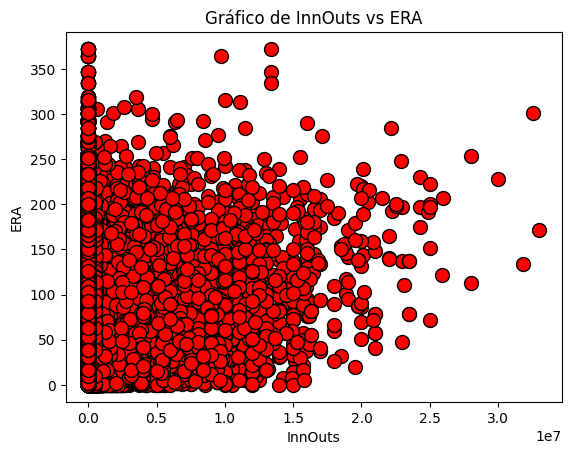

In [662]:
plotData(X, y)

Multiplicamos x por sigo misma y lo unimos al array de x

In [663]:
X = np.concatenate([X, X * X], axis=1)
print(X.shape)

(16115, 18)


Imprimimos x

In [664]:

print("Primeros 5 datos de cada columna de X y X * X:")
num_cols = X.shape[1]

for i in range(num_cols):
    print(f"Columna {i} (primeros 5 elementos):")
    print(X[:5, i])

Primeros 5 datos de cada columna de X y X * X:
Columna 0 (primeros 5 elementos):
[1985. 1985. 1985. 1985. 1985.]
Columna 1 (primeros 5 elementos):
[870000. 550000. 633333. 150000. 483333.]
Columna 2 (primeros 5 elementos):
[221. 620. 383. 258. 178.]
Columna 3 (primeros 5 elementos):
[ 2. 13.  7.  9.  2.]
Columna 4 (primeros 5 elementos):
[1. 4. 4. 2. 1.]
Columna 5 (primeros 5 elementos):
[2. 7. 4. 6. 2.]
Columna 6 (primeros 5 elementos):
[221. 620. 383. 258. 178.]
Columna 7 (primeros 5 elementos):
[ 84. 198. 130.  84.  49.]
Columna 8 (primeros 5 elementos):
[10. 17.  8.  5.  7.]
Columna 9 (primeros 5 elementos):
[3940225. 3940225. 3940225. 3940225. 3940225.]
Columna 10 (primeros 5 elementos):
[7.56900000e+11 3.02500000e+11 4.01110689e+11 2.25000000e+10
 2.33610789e+11]
Columna 11 (primeros 5 elementos):
[ 48841. 384400. 146689.  66564.  31684.]
Columna 12 (primeros 5 elementos):
[  4. 169.  49.  81.   4.]
Columna 13 (primeros 5 elementos):
[ 1. 16. 16.  4.  1.]
Columna 14 (primeros 5 e

Realizamos la normalización de x mediante la desviación estándar, donde mu es la media de cada característica, sigma la desviación estándar y en X_norm se guarda los valores donde se utiliza mu y sigma

In [665]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    sigma = np.where(sigma == 0, 1, sigma)  # Evitar división por cero
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

Aqui llamamos a la funcion e imprimimos los datos

In [666]:
X_norm, mu, sigma = featureNormalize(X)
print("Medias después de la normalización (deberían estar cerca de 0):")
print(np.mean(X_norm, axis=0))
print("Desviaciones estándar después de la normalización (deberían estar cerca de 1):")
print(np.std(X_norm, axis=0))

print("X normalizado:")
print(X_norm)
print("Medias (mu):")
print(mu)
print("Desviaciones estándar (sigma):")
print(sigma)

Medias después de la normalización (deberían estar cerca de 0):
[ 1.18519322e-14  5.64377724e-17  2.46915254e-17 -7.76019370e-17
  4.93830508e-17  5.29104116e-17 -3.52736077e-17 -1.09348184e-16
 -7.58382566e-17 -5.19227506e-15 -1.41094431e-17 -5.99651331e-17
 -2.11641646e-17  4.23283293e-17 -1.05820823e-17  7.05472155e-17
 -1.76368039e-17 -2.29278450e-17]
Desviaciones estándar después de la normalización (deberían estar cerca de 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
X normalizado:
[[-1.85568948 -0.34810642 -0.04236158 ... -0.31250977 -0.19921923
  -0.13600831]
 [-1.85568948 -0.45095187  2.01369424 ...  2.22286736  2.02770261
   0.73965419]
 [-1.85568948 -0.42416931  0.792428   ...  0.42679861  0.4826838
  -0.30280117]
 ...
 [ 1.67159552  6.48882006  2.34864068 ...  2.8637781   1.19790615
   3.85312089]
 [ 1.67159552  2.71475953  1.10160933 ...  0.80125822  0.29295072
   0.44313356]
 [ 1.67159552 -0.45901881 -0.14542203 ... -0.37627973 -0.50782122
  -0.48349344]]
M

Después de featureNormalize la función es probada, se añade el termino de intersección a X_norm: Se vuelve a graficar pero ahora con X_norm

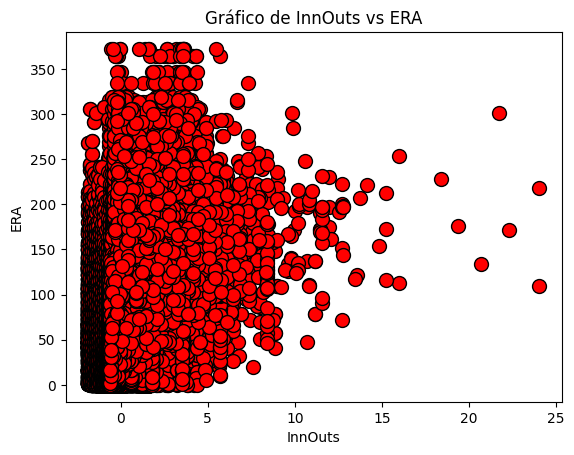

In [667]:
plotData(X_norm, y)

Aqui agregamos una columna de 1 a la matriz X_norm

In [668]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [669]:
print(X)
print(X.shape)

[[ 1.         -1.85568948 -0.34810642 ... -0.31250977 -0.19921923
  -0.13600831]
 [ 1.         -1.85568948 -0.45095187 ...  2.22286736  2.02770261
   0.73965419]
 [ 1.         -1.85568948 -0.42416931 ...  0.42679861  0.4826838
  -0.30280117]
 ...
 [ 1.          1.67159552  6.48882006 ...  2.8637781   1.19790615
   3.85312089]
 [ 1.          1.67159552  2.71475953 ...  0.80125822  0.29295072
   0.44313356]
 [ 1.          1.67159552 -0.45901881 ... -0.37627973 -0.50782122
  -0.48349344]]
(16115, 19)


calcula el costo (o error) de un modelo de regresión lineal multivariable dado un conjunto de datos, los parámetros actuales del modelo (theta), y los valores reales de salida (y), J como costo inicia en 0,  h tiene el valor de calcula el producto punto (o producto matricial) de X y theta. donde h es la prediccion,


In [670]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

descenso por gradiente para un modelo de regresión lineal multivariable (también conocida como regresión lineal múltiple), alpha valor de aprendisaje, num_iters numero de iteraciones, tetha vector de parametro, se crea una copia de tetha para no modificar la original, calcula el erroe entre las predicciones y el valor real, (alpha / m) * (np.dot(X, theta) - y).dot(X): Multiplica el error por la tasa de aprendizaje alpha y por la matriz de características X, escalada por el número de ejemplos m. Este término ajusta theta en la dirección que minimiza el error.

In [671]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


Estamos usando solo 1000 ejemplos, y aplha con 0.01, iteraciones 10000, inicializamos theta con la cantidad de columnas de x, llamamos a gradientedescens, imprimimos el costo, damos valores a X_array y al final calculamos el precio

Costo final después del descenso por gradiente: 157.1660


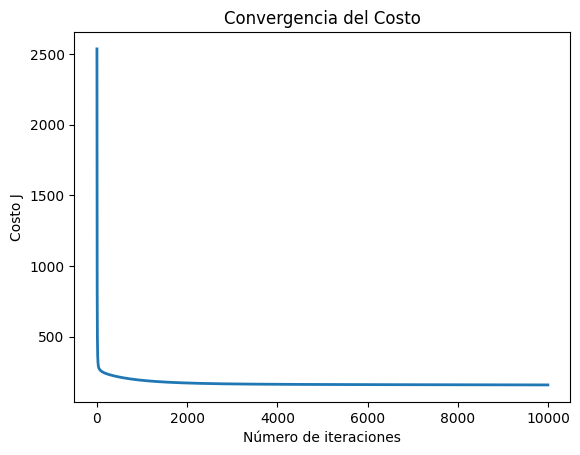

Theta calculado por el descenso por el gradiente: [ 25.78362501  -5.62307431  -2.86451074   2.60454252  -5.69288426
   3.2925       4.24350892  42.88722897  -6.3019629    1.51190978
  -5.80990166  -5.55690664   2.35405479   1.14096826  -2.5966336
  -4.9192624   27.39685615 -28.43975121   1.09370438]
Shape of X_array_normalized: (19,)
Shape of theta: (19,)
La capacidad adquisitiva para la instancia dada (usando el descenso por el gradiente): $738.85


In [672]:
# Elegir algún valor para alpha (probar varias alternativas)
num_samples = 1000
X = X[:num_samples]
y = y[:num_samples]
alpha = 0.01
num_iters = 10000

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Imprimir el costo final después del descenso por gradiente
print('Costo final después del descenso por gradiente: {:.4f}'.format(J_history[-1]))

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Costo')
pyplot.show()

# Muestra los resultados del descenso por el gradiente
print('Theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# La capacidad adquisitiva de una persona de 33 años
X_array = np.array([1985, 300, 10, 5, 2, 80, 40, 0.270, 15, 3, 20, 5, 8, 2, 10, 12, 3, 1])

# Normalizar X_array
X_array_normalized = (X_array - mu) / sigma

# Añadir el término de sesgo (1) al inicio
X_array_normalized = np.insert(X_array_normalized, 0, 1)  # Insertar 1 para el término de sesgo

# Asegúrate de que X_array_normalized tenga el mismo número de columnas que theta
if X_array_normalized.shape[0] != theta.shape[0]:
    raise ValueError(f"Dimensiones incompatibles: X_array_normalized tiene {X_array_normalized.shape[0]} columnas, pero theta tiene {theta.shape[0]} columnas")

# Calcular la predicción
price = np.dot(X_array_normalized, theta)

# Imprimir el resultado
print("Shape of X_array_normalized:", np.shape(X_array_normalized))
print("Shape of theta:", np.shape(theta))
print('La capacidad adquisitiva para la instancia dada (usando el descenso por el gradiente): ${:.2f}'.format(price))

[2536.2756545353163, 1942.8214909678156, 1522.3851293940077, 1222.2219522358905, 1005.956613061874, 848.4668145635103, 732.3705839278626, 645.6139472446831, 579.8138176620538, 529.11925116632, 489.4285529021761, 457.85071326801324, 432.33464177181213, 411.4136731922613, 394.02929260146084, 379.40932852258055, 366.9836196068483, 356.3254829770363, 347.1109655645939, 339.0903673620736, 332.0682470259272, 325.88930235064066, 320.4283300247134, 315.5830268866578, 311.2687782975888, 307.41484290650817, 303.96152452164074, 300.8580467632391, 298.0609323318157, 295.5327482114268, 293.24111926882387, 291.15794122519213, 289.25874379624065, 287.5221686180092, 285.92953625550973, 284.46448340563785, 283.11265623318803, 281.86144922458334, 280.69978142557966, 279.61790373512486, 278.60723225732676, 277.66020370557334, 276.7701496035682, 275.93118660466433, 275.13812070056633, 274.38636344651576, 273.67185861608715, 272.9910179316302, 272.3406647083988, 271.7179844104496, 271.12048125105537, 270.5

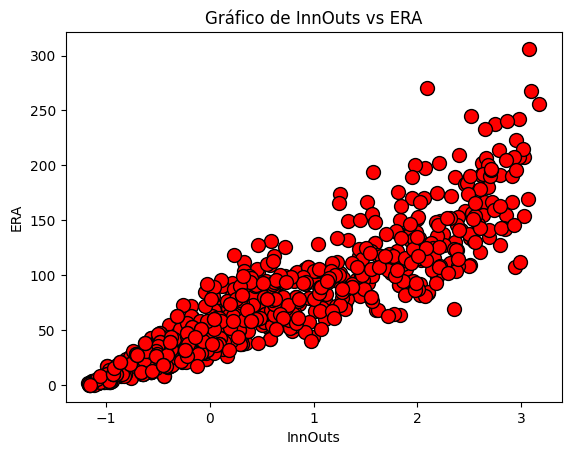

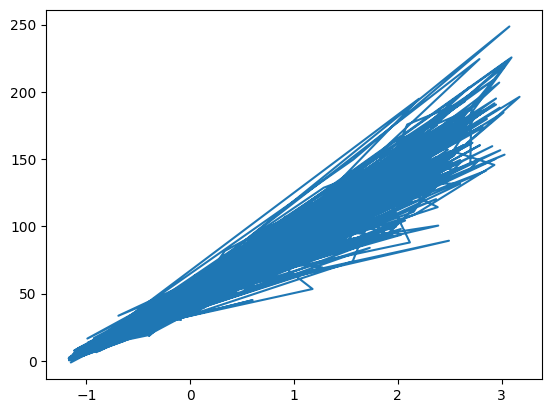

In [673]:
print(J_history)
print(X.shape)
print(y.shape)
plotData(X[:, 7], y)
pyplot.plot(X[:, 7], np.dot(X, theta), '-')

In [674]:
X_array = np.array([1985, 300, 10, 5, 2, 80, 40, 0.270, 15, 3, 20, 5, 8, 2, 10, 12, 3, 1])

# Normalizar X_array
X_array_normalized = (X_array - mu) / sigma

# Añadir el término de sesgo (1) al inicio
X_array_normalized = np.insert(X_array_normalized, 0, 1)

In [675]:
print(np.dot(X_array_normalized, theta))


738.8460642466199


<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Sacamos el dataset, eliminamos las columnas que no se usaran, como la fila 0, damos los valores a x y a "y", sacamos una copia de x, agregamos las columnas donde sera x*x, agregamos la columna de sesgo

In [676]:
#Cargar desde la carpeta
#data = np.genfromtxt('Ptichers_Adjusted_Salary.csv', delimiter=',')
# Cargar datos

data = np.genfromtxt('/content/gdrive/Othercomputers/Mi portátil/6to Semetre Original/IA/labs/lab2/Ptichers_Adjusted_Salary.csv', delimiter=',')

data_sin_primera_fila = np.delete(data, 0, axis=0)

# Lista de columnas a eliminar (ajustada para mantener las columnas relevantes)
columnas_a_eliminar = [0, 2, 4, 7, 9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]

data = np.delete(data_sin_primera_fila, columnas_a_eliminar, axis=1)

X = data[:, :-1]  # Selecciona todas menos la última columna (ERA)
y = data[:, -1]
m = y.size
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

damos los valores de tetha con la cantidad de columnas de x, aplicamos la ecuacion de la normal

In [677]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

llamamos a la funcion, imprimimos los datos, damos valores a X_array y multiplicamos por tetha

In [678]:
theta = normalEqn(X, y);
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));
X_array = [1, 34, 1156]
X_array[2:18] = (X_array[2:18] - mu) / sigma
X_array = X_array[:19]
price = np.dot(X_array, theta)
print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [-6.31167976e+04  6.25809997e+01  2.87845343e-07  2.42600825e-02
 -8.67269117e-01 -9.48438384e-02 -4.48579069e-01  4.22176501e-01
 -5.20950524e-01  1.82464585e-01 -1.55111556e-02  2.14636905e-14
  1.41234338e-06  2.71265280e-03  1.01559670e-01  3.67981946e-02
  3.99450371e-05 -8.74961905e-04  2.49576241e-03]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $-61399


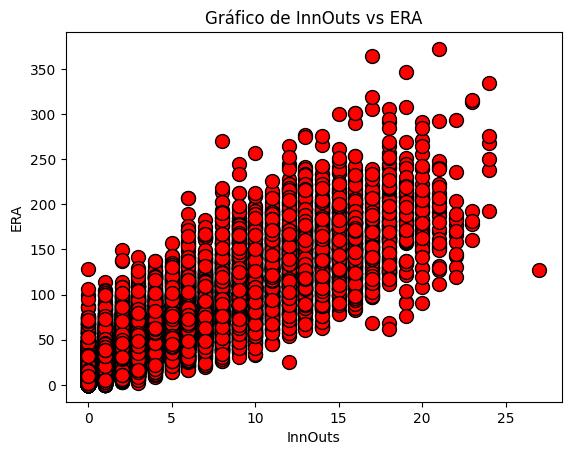

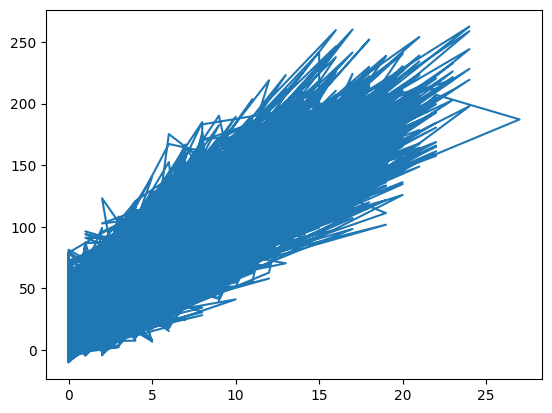

In [679]:
plotData(X[:, 6], y)
pyplot.plot(X[:, 6], np.dot(X, theta), '-')